In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pbm_dir = r"C:\Users\LENOVO\Desktop\Y4S2\Computational Neuroscience\Assignment\pbm" 
pbm_files = sorted([f for f in os.listdir(pbm_dir) if f.endswith(".pbm")])
pbmf_dir = r"C:\Users\LENOVO\Desktop\Y4S2\Computational Neuroscience\Assignment\pbmf" 
pbmf_files = sorted([f for f in os.listdir(pbmf_dir) if f.endswith(".pbm")])
print("PBM files (original, unprocessed):", pbmf_files)

PBM files (original, unprocessed): ['alien.pbm', 'apple.pbm', 'banana.pbm', 'boy.pbm', 'cat.pbm', 'cherry.pbm', 'deadpac.pbm', 'fox.pbm', 'grape.pbm', 'king.pbm', 'lime.pbm', 'orange.pbm', 'pac.pbm', 'paceat.pbm', 'pacleft.pbm', 'pacright.pbm', 'pacstraight.pbm', 'pacup.pbm', 'pandit.pbm', 'pineapple.pbm', 'policeman.pbm', 'puppy.pbm', 'soldier.pbm', 'strawberry.pbm', 'watermelon.pbm']


In [3]:
num_images = len(pbm_files)
cols = 5  
rows = 5

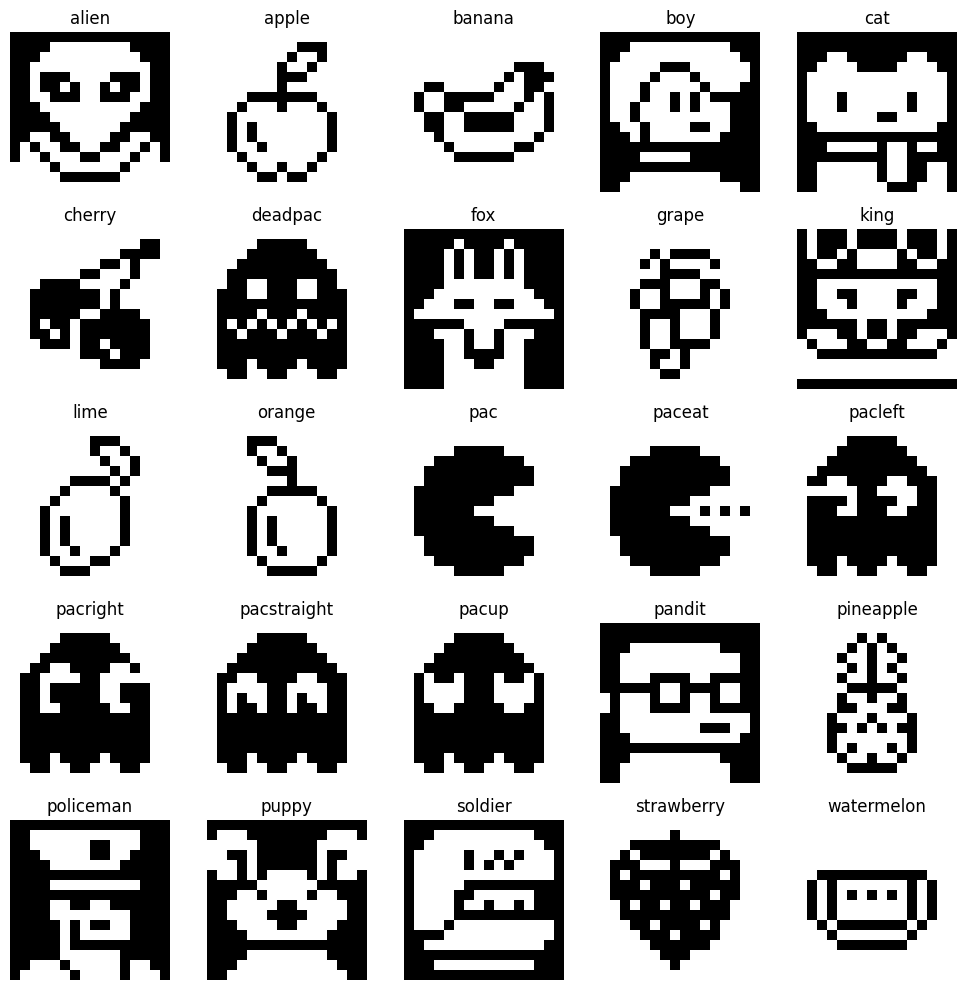

In [4]:
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
axes = axes.flatten() if rows > 1 else [axes]  

for i, pbm_file in enumerate(pbmf_files):
    img_path = os.path.join(pbmf_dir, pbm_file) 
    img = Image.open(img_path)

    axes[i].imshow(img, cmap="gray", interpolation="nearest")
    axes[i].set_title(pbm_file.replace(".pbm", "")) 
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [5]:
def load_pbm(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    pixel_data = [int(x) for line in lines[2:] for x in line.split()]
    return np.array([1 if pixel == 1 else -1 for pixel in pixel_data])

In [6]:
def load_dataset(folder_path):
    dataset = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".pbm"):
            file_path = os.path.join(folder_path, filename)
            dataset.append(load_pbm(file_path))
    return np.array(dataset)

In [7]:
dataset_path = r"C:\Users\LENOVO\Desktop\Y4S2\Computational Neuroscience\Assignment\pbm"
patterns = load_dataset(dataset_path)  #(25, 256)

In [8]:
print(patterns)

[[ 1  1  1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 ...
 [ 1  1  1 ...  1  1  1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]


In [9]:
def train_hopfield(patterns):
    num_neurons = patterns.shape[1]
    W = np.zeros((num_neurons, num_neurons))

    for X in patterns:
        W += np.outer(X, X)  

    np.fill_diagonal(W, 0)
    
    return W

In [10]:
W = train_hopfield(patterns)

In [11]:
print(W)

[[ 0. 23. 25. ... 15. 19. 23.]
 [23.  0. 23. ... 13. 17. 21.]
 [25. 23.  0. ... 15. 19. 23.]
 ...
 [15. 13. 15. ...  0. 21. 17.]
 [19. 17. 19. ... 21.  0. 21.]
 [23. 21. 23. ... 17. 21.  0.]]


In [12]:
def syncr_recall(W, pattern, max_iterations=100):
    X = pattern.copy()
    for _ in range(max_iterations):
        X_new = np.sign(W @ X)  
        X_new[X_new == 0] = 1  
        if np.array_equal(X, X_new):
            break
        X = X_new
    return X

In [13]:
corrupted_file_path = r"C:\Users\LENOVO\Desktop\Y4S2\Computational Neuroscience\Assignment\corrupted\corrupted_1_p1.pbm"
corrupted_pattern = load_pbm(corrupted_file_path)

In [14]:
def display_pattern(pattern, title=""):

    pattern_matrix = pattern.reshape((16, 16))
    
    plt.imshow(pattern_matrix, cmap='gray_r') 
    plt.title(title)
    plt.axis('off')  
    plt.show()

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1.  1.
 -1. -1. -1.  1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1.
 -1. -1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.
  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1.  1.  1.
  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1. -1.  1. -1. -1. -1.
 -1.  1. -1. -1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1.
  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

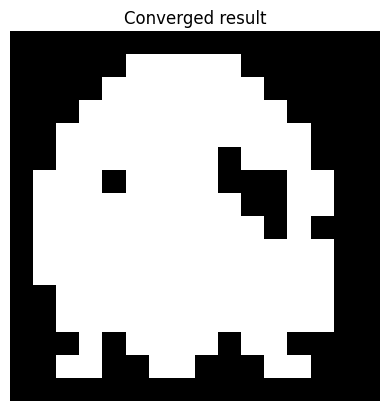

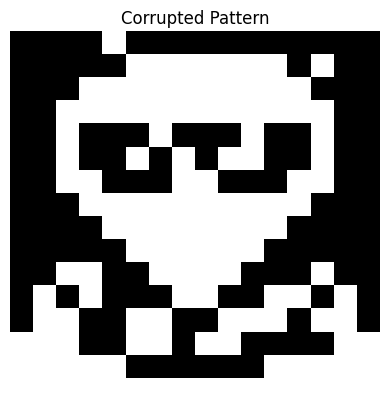

In [15]:
tested_pattern = syncr_recall(W, corrupted_pattern)
print(tested_pattern)
display_pattern(tested_pattern, "Converged result")
display_pattern(corrupted_pattern, "Corrupted Pattern")

In [16]:
def recall_asynchronous(W, pattern, max_iterations=100):
    
    X = pattern.copy()  
    N = len(X)

    for _ in range(max_iterations):
        neuron_indices = np.random.permutation(N) 
        
        for i in neuron_indices:
            X[i] = np.sign(np.dot(W[i], X)) 

        X[X == 0] = 1  

    return X  

In [17]:
async_recall_pattern = recall_asynchronous(W, corrupted_pattern, 10000)

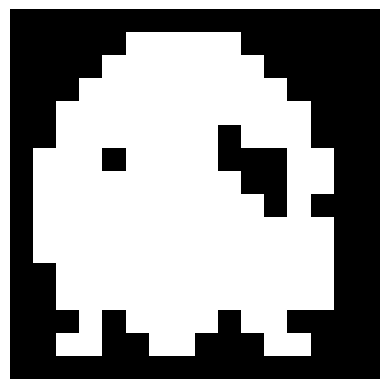

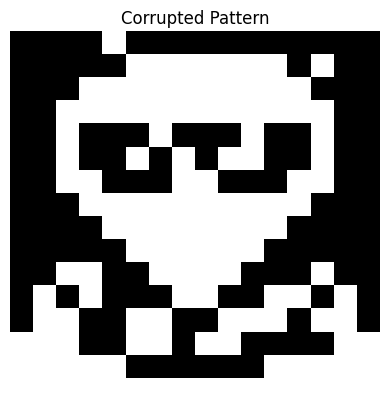

In [18]:
display_pattern(async_recall_pattern)
display_pattern(corrupted_pattern, "Corrupted Pattern")
#print(patterns)

In [20]:
pbm_names = [f.replace("_p1.pbm", "") for f in pbm_files]

print("\navailable patterns:")
for i, name in enumerate(pbm_names, start=1):
    print(f"{i}: {name}")

choices = input("\nenter 3 patterns (1-indexed): ")
selected_indices = [int(i) - 1 for i in choices.split(",")]

selected_pattern_names = [pbm_names[i] for i in selected_indices]
selected_patterns = [patterns[i] for i in selected_indices]

print("\nselected:", selected_pattern_names)

choice_corrupt = int(input("\nenter pattern to corrupt"))
     
#print(patterns)


available patterns:
1: alien
2: apple
3: banana
4: boy
5: cat
6: cherry
7: deadpac
8: fox
9: grape
10: king
11: lime
12: orange
13: pac
14: paceat
15: pacleft
16: pacright
17: pacstraight
18: pacup
19: pandit
20: pineapple
21: policeman
22: puppy
23: soldier
24: strawberry
25: watermelon



enter 3 patterns (1-indexed):  1, 10, 13



selected: ['alien', 'king', 'pac']



enter pattern to corrupt 1


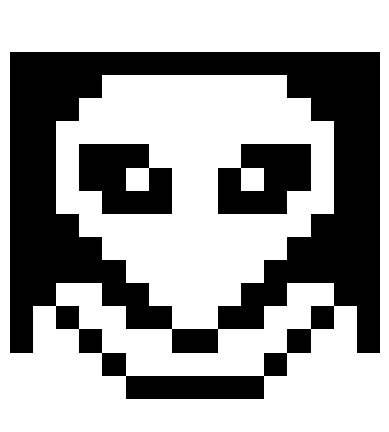

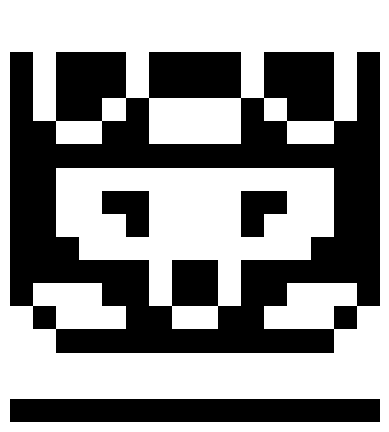

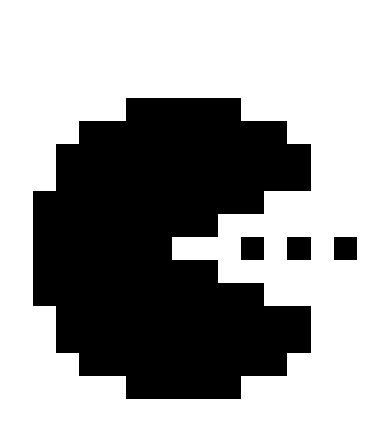

In [21]:
for i, pattern in enumerate(patterns):  
    if (i) in selected_indices:  
        display_pattern(pattern, "\n")
#print(selected_patterns)

In [22]:
selected_patterns = np.array(selected_patterns)
W_selected = train_hopfield(selected_patterns)

In [23]:
print(W_selected)
print(W)

[[ 0.  1.  3. ...  1.  1.  1.]
 [ 1.  0.  1. ... -1. -1. -1.]
 [ 3.  1.  0. ...  1.  1.  1.]
 ...
 [ 1. -1.  1. ...  0.  3.  3.]
 [ 1. -1.  1. ...  3.  0.  3.]
 [ 1. -1.  1. ...  3.  3.  0.]]
[[ 0. 23. 25. ... 15. 19. 23.]
 [23.  0. 23. ... 13. 17. 21.]
 [25. 23.  0. ... 15. 19. 23.]
 ...
 [15. 13. 15. ...  0. 21. 17.]
 [19. 17. 19. ... 21.  0. 21.]
 [23. 21. 23. ... 17. 21.  0.]]


In [24]:
def corrupt_pattern(pattern, p):
    n_flips = int(p*256)
    #print(n_flips)
    flip_indices = np.random.choice(np.arange(256), size=n_flips)
    pattern[flip_indices] *= -1
    return pattern, flip_indices

In [25]:
print(choice_corrupt)
print(patterns)
print(patterns[choice_corrupt-1])

1
[[ 1  1  1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 ...
 [ 1  1  1 ...  1  1  1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1 -1 -1
 -1 -1  1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1  1 -1  1  1 -1  1  1
  1  1 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1 -1 -1
 -1 -1  1  1 -1 -1  1  1  1 -1  1 -1 -1  1  1 -1 -1  1  1 -1 -1  1 -1  1
  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


[131 207   3 170  69 142 143 251 190  36 193  90  15   3 187 150  91 251
  94 166 121   5  67 101 103 238  75  24  54   2 111  61  62  63  42   1
   8  54 149  68   4 143 200 108 171  17 111  81 232 231  62 148 229 168
  77  91 123 225 146 205 218 238 198 178  10 217 177 165  94 251 164  56
 202 207  80 229]
[ 1 -1 -1 -1 -1 -1  1  1 -1  1 -1  1  1  1  1 -1  1 -1  1  1 -1 -1 -1 -1
  1 -1 -1 -1  1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1
  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1  1  1  1  1 -1 -1 -1  1  1 -1  1 -1 -1  1  1 -1  1 -1 -1  1
  1  1 -1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1
 -1  1 -1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1
  1  1 -1  1 -1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1  1
  1  1 -1  1 -1 -1  1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1  1  1  1 -1 -1 -1 -1 -1  1 -1

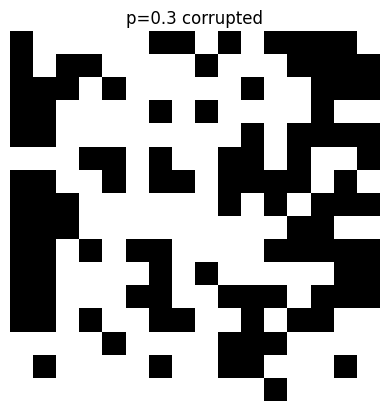

In [26]:
corrupted_pattern, flips = corrupt_pattern(patterns[choice_corrupt-1], 0.3)
print(flips)
print(corrupted_pattern)
display_pattern(corrupted_pattern, "p=0.3 corrupted")

In [27]:
async_recall_pattern_selected = recall_asynchronous(W_selected, corrupted_pattern, 10000)

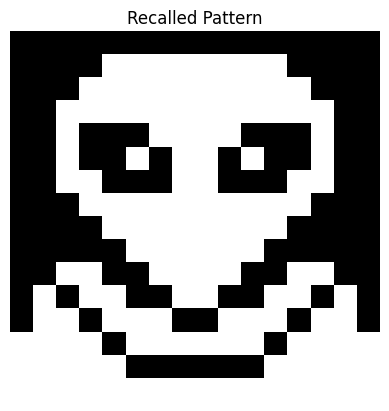

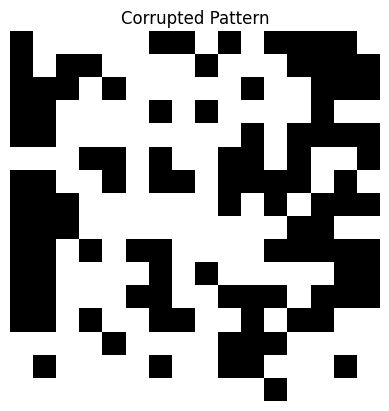

In [28]:
display_pattern(async_recall_pattern_selected, "Recalled Pattern")
display_pattern(corrupted_pattern, "Corrupted Pattern")

In [29]:
def corrupt_screen(patterns, c):
    arr2d = patterns[c-1].reshape(16, 16).copy() 
    arr2d[:, :] = -1 
    arr2d[3:13, 3:13] = patterns[c-1].reshape(16, 16)[3:13, 3:13] 
    return arr2d

In [30]:
corrupted_scr = np.array(corrupt_screen(patterns, 15)).reshape(1, 256)
corrupted_scr = corrupted_scr[0]

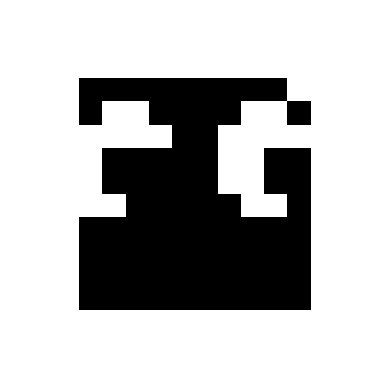

In [31]:
display_pattern(corrupted_scr)

In [32]:
def syncr_recall(W, pattern, max_iterations=100):
    X = pattern.copy()
    snapshots = [X.copy()] 
    iterations = np.linspace(1, max_iterations, 5, dtype=int)  

    for i in range(1, max_iterations + 1):
        X_new = np.sign(W @ X)
        X_new[X_new == 0] = 1  
        if np.array_equal(X, X_new):
            break
        X = X_new

        if i in iterations:  
            snapshots.append(X.copy())

    snapshots.append(X.copy()) 
    return snapshots  

In [33]:
def recall_asynchronous(W, pattern, max_iterations=100):
    X = pattern.copy()  
    snapshots = []  
    snapshot_iters = np.linspace(1, max_iterations, 5, dtype=int)

    for iteration in range(1, max_iterations + 1):  
        prev_X = X.copy()
        neuron_indices = np.random.permutation(256)  
        
        for i in neuron_indices:
            X[i] = np.sign(np.dot(W[i], X))

        X[X == 0] = 1  

        if iteration in snapshot_iters:  
            snapshots.append(X.copy())

        if np.array_equal(X, prev_X):  
            break

    return snapshots  

In [34]:
async_pattern_runscr_selected = recall_asynchronous(W_selected, corrupted_scr, 10000)

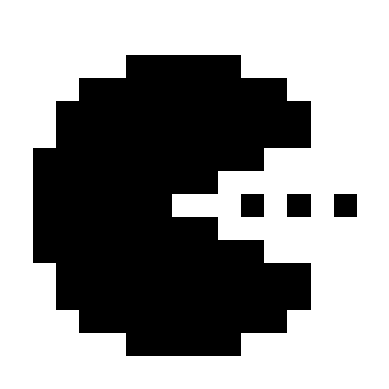

In [35]:
for p in async_pattern_runscr_selected:    display_pattern(p)

In [36]:
def syncr_recall(W, pattern, patterns_saved, max_iterations=1000):
    X = pattern.copy()
    snapshots = [X.copy()] 
    iterations = np.linspace(1, max_iterations, 5, dtype=int)

    match = -1 
    itr = max_iterations  

    for i in range(1, max_iterations + 1):
        
        prev_X = X.copy()

        if any(np.array_equal(X, stored) for stored in patterns_saved):
            print(f"converged to a stored pattern at iteration {i}")
            match = X
            display_pattern(X, "")
            itr = i
            break
        
        X_new = np.sign(W @ X)
        X_new[X_new == 0] = 1  
        
        if np.array_equal(X, X_new):  
            itr = i
            break

        X = X_new

        if i in iterations:
            snapshots.append(X.copy())

        if any(np.array_equal(X, stored) for stored in patterns_saved):
            print(f"converged to a stored pattern at iteration {i}")
            match = X
            display_pattern(X, "")
            itr = i
            break

    snapshots.append(X.copy())
    return snapshots, match, itr


[[ 1  1  1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 ...
 [ 1  1  1 ...  1  1  1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]


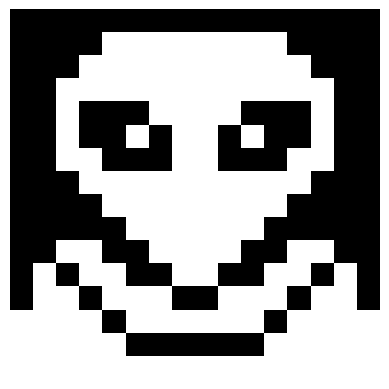

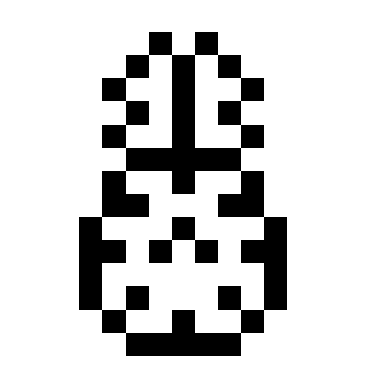

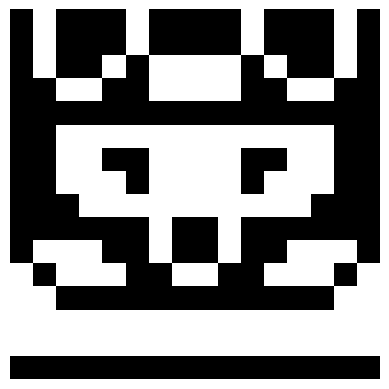

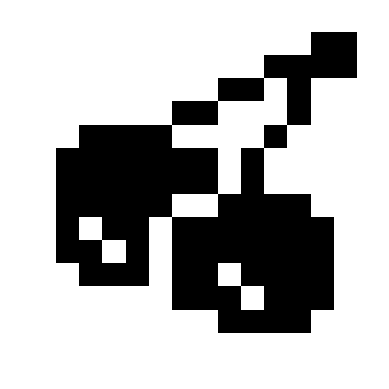

In [46]:
dataset_path = r"C:\Users\LENOVO\Desktop\Y4S2\Computational Neuroscience\Assignment\pbm"
patterns = load_dataset(dataset_path)
print(patterns)
patterns_saved = patterns[[0, 19, 9, 5], :]
len(patterns_saved)
for p in patterns_saved:
    display_pattern(p)

In [47]:
W_conv = train_hopfield(patterns_saved)
print(W_conv)

[[0. 2. 4. ... 2. 2. 2.]
 [2. 0. 2. ... 0. 0. 0.]
 [4. 2. 0. ... 2. 2. 2.]
 ...
 [2. 0. 2. ... 0. 4. 4.]
 [2. 0. 2. ... 4. 0. 4.]
 [2. 0. 2. ... 4. 4. 0.]]


In [48]:
def syncr_recall_no_screenshots(W, pattern, patterns_saved, pattern_idx, max_iterations=1000):
    X = pattern.copy()
    itr = max_iterations  
    converged = False
    correct_convergence = False
    final_pattern = None

    for i in range(1, max_iterations + 1):
        if any(np.array_equal(X, stored) for stored in patterns_saved):
            converged = True
            itr = i
            final_pattern = X  # Store the converged pattern
            
            if np.array_equal(X, original_pattern):
                correct_convergence = True
            break
        
        X_new = np.sign(W @ X)
        X_new[X_new == 0] = 1  

            
        if np.array_equal(final_pattern, patterns_saved[pattern_idx]):
            final_pattern_status = "correct pattern"
            itr = i
            converged = True
            final_pattern = X
            break

        if np.array_equal(X, X_new): 
            itr = i
            converged = True
            final_pattern = X
            break
            
        X = X_new

    if final_pattern is None or not any(np.array_equal(final_pattern, stored) for stored in patterns_saved):
        final_pattern_status = "unrecognized pattern (did not match any stored pattern)"
    elif np.array_equal(final_pattern, patterns_saved[pattern_idx]):
        final_pattern_status = "correct pattern"
    else:
        final_pattern_status = "different stored pattern"
        #display_pattern(final_pattern)
        #display_pattern(original_pattern)
        
    return converged, correct_convergence, itr, final_pattern, final_pattern_status


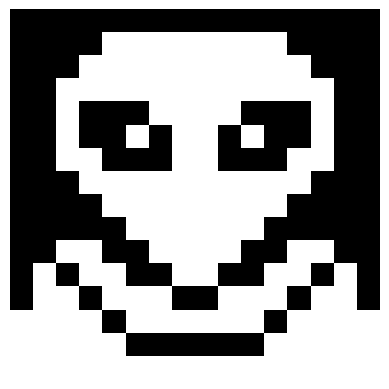

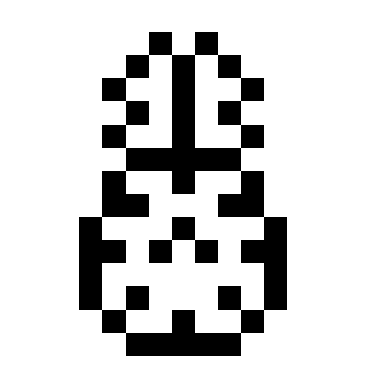

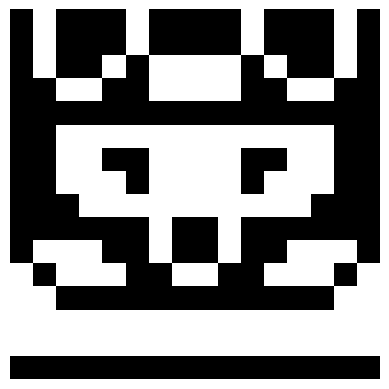

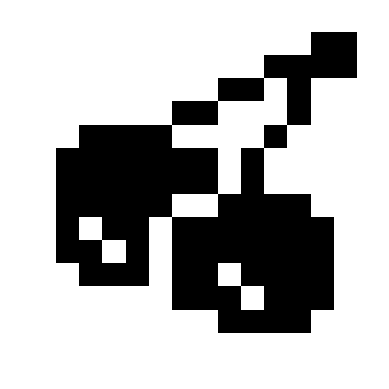

In [49]:
for p in patterns_saved:
    display_pattern(p)
probabilities = [0.05, 0.10, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
num_initializations = 5  # 5 sets of 4 patterns each
patterns_per_initialization = 3 #king, alien, paceat
total_runs = num_initializations * patterns_per_initialization  

results = []
aggregated_results = {}


In [51]:
import csv

for p in probabilities:
    total_converged = 0
    correct_converged = 0
    correct_convergence_steps = []

    for init_num in range(num_initializations):
        for pattern_idx in range(patterns_per_initialization):
            original_pattern = patterns_saved[pattern_idx].copy()
            #print(pattern_idx)
            #display_pattern(corrupted_pattern)
            converged, correct_convergence, steps, final_pattern, final_pattern_status = syncr_recall_no_screenshots(
                W_conv, corrupted_pattern, patterns_saved, pattern_idx
            )

            if converged:
                total_converged += 1
                if correct_convergence:
                    correct_converged += 1
                    correct_convergence_steps.append(steps)

            results.append([
                p, init_num + 1, pattern_idx + 1, converged, correct_convergence, steps, final_pattern_status
            ])

    aggregated_results[p] = {
        "total_success_fraction": total_converged / total_runs,
        "correct_success_fraction": correct_converged / total_runs,
        "correct_convergence_steps": correct_convergence_steps
    }


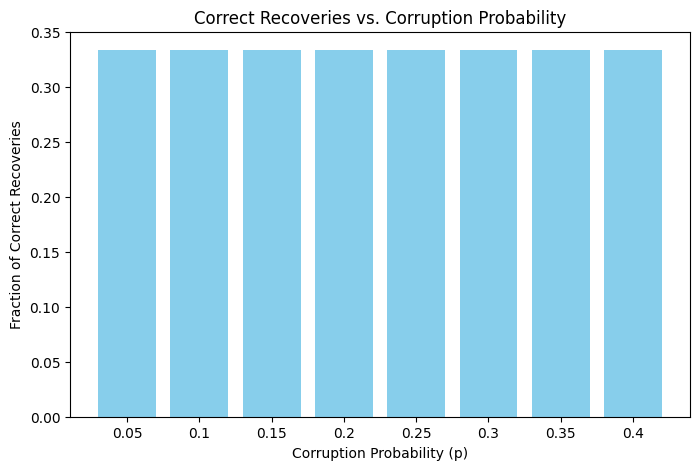

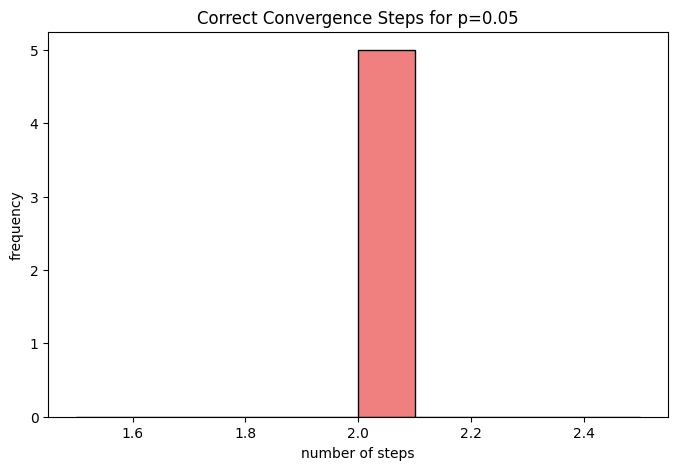

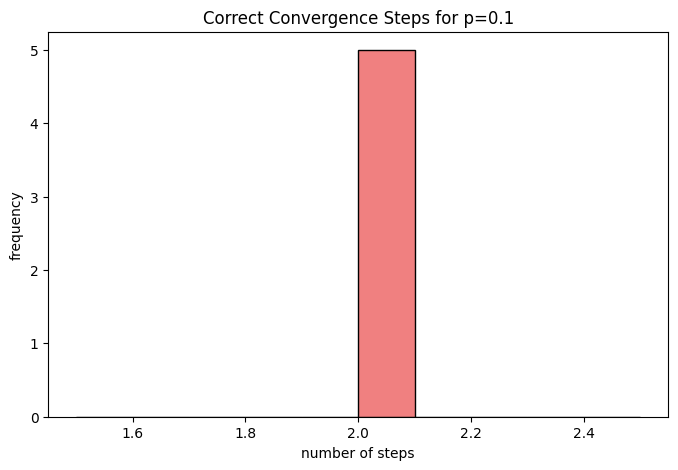

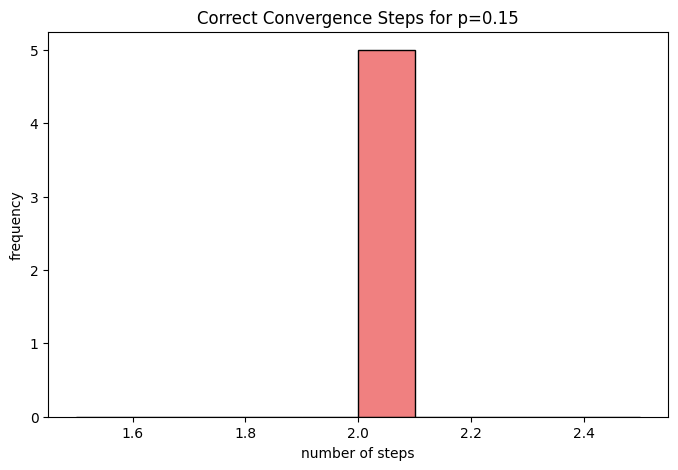

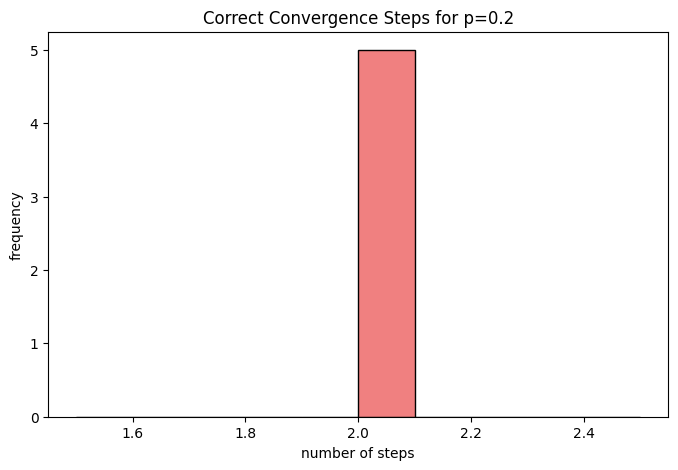

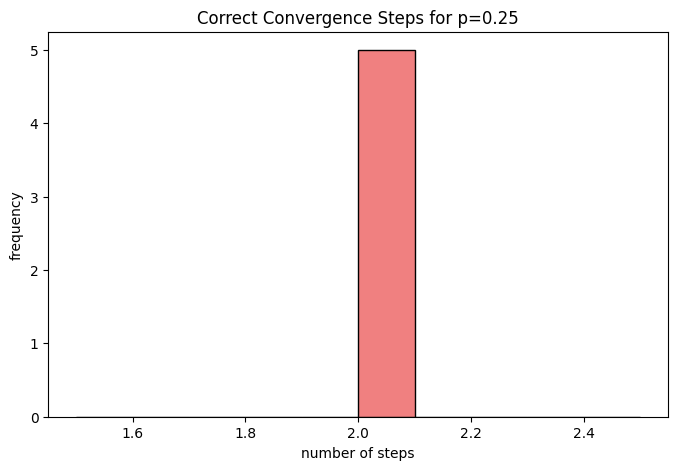

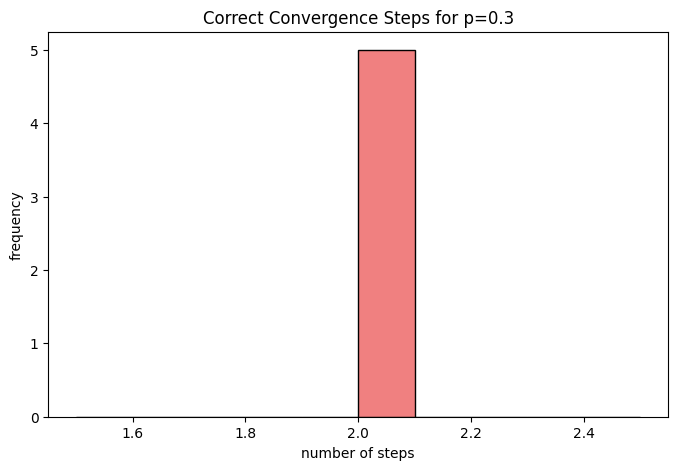

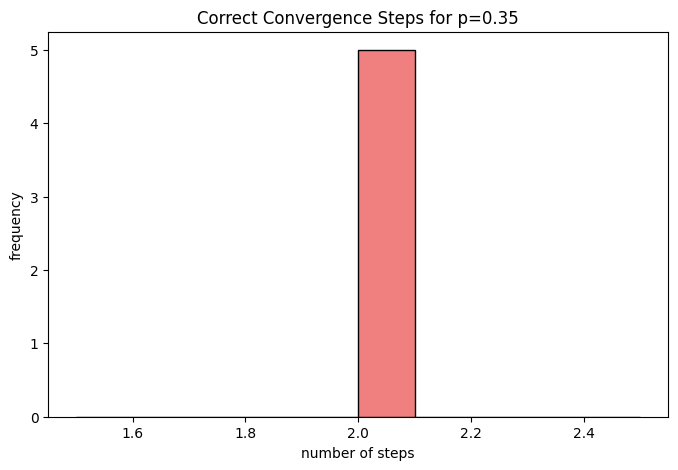

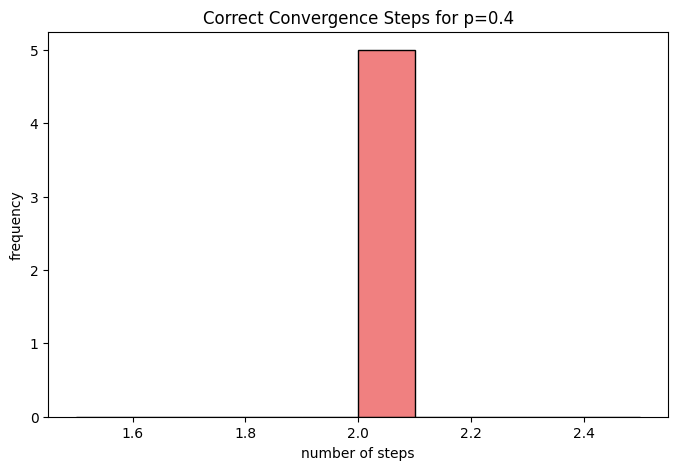

In [52]:

csv_filename = "convergence_results.csv"
with open(csv_filename, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["probability", "initialization", "pattern", "converged", "correct convergence", "update steps", "final pattern"])
    writer.writerows(results)

plt.figure(figsize=(8, 5))
plt.bar([str(p) for p in probabilities], [aggregated_results[p]["correct_success_fraction"] for p in probabilities], color="skyblue")
plt.xlabel("Corruption Probability (p)")
plt.ylabel("Fraction of Correct Recoveries")
plt.title("Correct Recoveries vs. Corruption Probability")
plt.show()

for p in probabilities:
    if aggregated_results[p]["correct_convergence_steps"]:
        plt.figure(figsize=(8, 5))
        plt.hist(aggregated_results[p]["correct_convergence_steps"], bins=10, color="lightcoral", edgecolor="black")
        plt.xlabel("number of steps")
        plt.ylabel("frequency")
        plt.title(f"Correct Convergence Steps for p={p}")
        plt.show()
